## Loading Necessary Liabraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("C:\\Users\\adija\\Dropbox\\PC\\Desktop\\Downloads\\fma-rock-vs-hiphop.csv")
df.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [4]:
#Cheking shape of our dataframe
df.shape

(17734, 21)

In [5]:
#Cheking nulll percentage in our columns
(round((df.isna().sum()*100)/df.shape[0],2)).sort_values(ascending=False)

publisher        99.71
lyricist         99.70
composer         99.06
information      97.28
date_recorded    89.30
language_code    76.94
license           0.11
track_id          0.00
interest          0.00
tags              0.00
number            0.00
listens           0.00
genres_all        0.00
bit_rate          0.00
genres            0.00
genre_top         0.00
favorites         0.00
duration          0.00
date_created      0.00
comments          0.00
title             0.00
dtype: float64

- As we can see in the above first six columns are having null value which is more than 50% so it doesnt mean anything to fill those columns so we are dropping those columns

In [6]:
# Importing JSON data file
path= "C:\\Users\\adija\\Dropbox\\PC\\Desktop\\Downloads\\"
file="echonest-metrics.json"
df_=pd.read_json(path+file,orient="columns")
df_

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [7]:
#Merging both the files together
Data_set =pd.merge(left=df[["track_id","genre_top"]],right=df_,on="track_id")
Data_set

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,9.571129e-01,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,9.672940e-01,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,2.630763e-01,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,9.209505e-01,0.139587,0.088781,97.880,0.073548
...,...,...,...,...,...,...,...,...,...,...
4797,124718,Hip-Hop,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414
4798,124719,Hip-Hop,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720
4799,124720,Hip-Hop,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240
4800,124721,Hip-Hop,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087


In [8]:
#Checking correlation between independant variable
Corr_met=Data_set.corr()
Corr_met

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


## Ploting Correlation

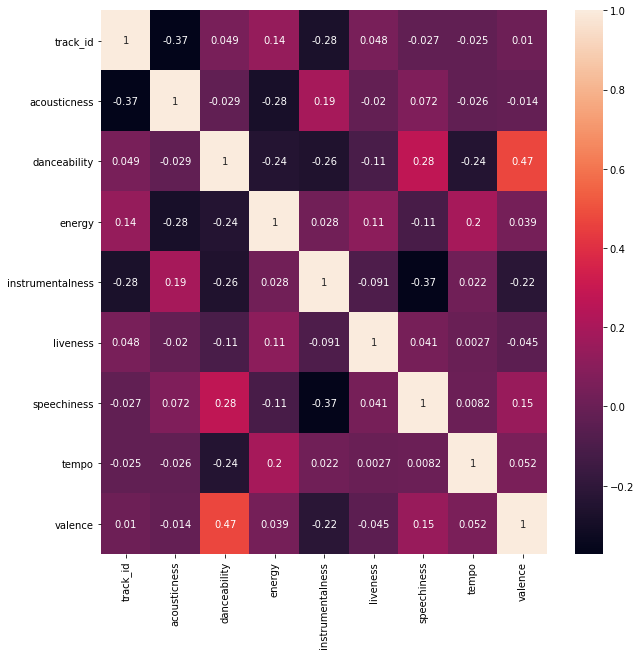

In [9]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(Corr_met,annot=True)
plt.show()

# Normalizing the independant variables

In [10]:
#Extracting fature variable from date_set because we dont need to normalise that 
feature= Data_set.drop(["track_id","genre_top"],axis=1)


In [11]:
#Define our labels
labels=Data_set["genre_top"]

In [12]:
#Normalising
scaler=StandardScaler()
Scaled_train_features=scaler.fit_transform(feature)

# Applying PCA on scaled data

In [13]:
pca=PCA()
pca.fit(Scaled_train_features)
Varience_exp=pca.explained_variance_ratio_
Varience_exp

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

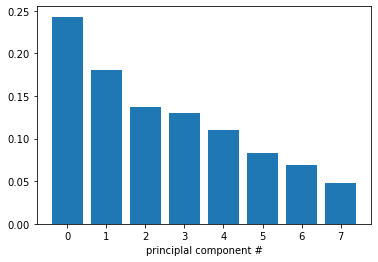

In [14]:
#Ploting varience explaned 
fig, ax=plt.subplots()
ax.bar(range(pca.n_components_),Varience_exp)
ax.set_xlabel("principlal component #")
plt.show()

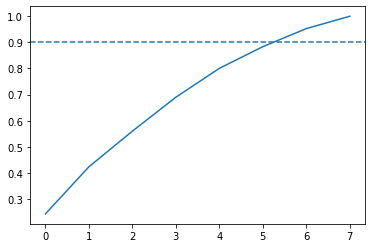

In [15]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig, ax= plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.axhline(y=0.9,linestyle="--")
plt.show()

In [16]:
n_components=7
pca=PCA(n_components,random_state=10)
pca.fit(Scaled_train_features)
pca_projection=pca.transform(Scaled_train_features)

In [17]:
pca_projection.shape

(4802, 7)

# Training Decision tree

In [18]:
#spliting our dataset
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, stratify = labels)

In [19]:
#Training our decision tree
tree=DecisionTreeClassifier(random_state=10)
tree.fit(train_features,train_labels)



DecisionTreeClassifier(random_state=10)

In [20]:
#Predict the label of the test data
pread_labels_tree=tree.predict(test_features)
pread_labels_tree

array(['Rock', 'Rock', 'Rock', ..., 'Rock', 'Hip-Hop', 'Rock'],
      dtype=object)

In [21]:
accuracy_score(test_labels,pread_labels_tree)

0.880932556203164

In [22]:
labels.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [23]:
confusion_matrix(test_labels,pread_labels_tree)

array([[147,  81],
       [ 62, 911]], dtype=int64)

# Compare our decision tree to a logistic regression

In [24]:
# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state = 10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Create the classification report for both models
class_rep_tree = classification_report(test_labels, pread_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.70      0.64      0.67       228
        Rock       0.92      0.94      0.93       973

    accuracy                           0.88      1201
   macro avg       0.81      0.79      0.80      1201
weighted avg       0.88      0.88      0.88      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.80      0.55      0.65       228
        Rock       0.90      0.97      0.93       973

    accuracy                           0.89      1201
   macro avg       0.85      0.76      0.79      1201
weighted avg       0.88      0.89      0.88      1201



# Balancing our dataset

In [25]:
# Subset only the hip-hop tracks, and then only the rock tracks
hop_only = Data_set.loc[Data_set['genre_top'] == 'Hip-Hop']
rock_only = Data_set.loc[Data_set['genre_top'] == 'Rock']
rock_only.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [26]:
# Checking shape
rock_only.shape, hop_only.shape

((3892, 10), (910, 10))

In [27]:
# sample the rocks songs to be the same number as there are hip-hop songs
rock_only = rock_only.sample(n= hop_only.shape[0])
rock_only.shape, hop_only.shape

((910, 10), (910, 10))

In [28]:
# concatenate the dataframes rock_only and hop_only
rock_hop_bal = pd.concat([rock_only, hop_only])
rock_hop_bal.shape

(1820, 10)

In [29]:
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection,
                                                                            labels,
                                                                            stratify = labels,
                                                                            random_state=10)

# Checking that balancing ourdataset impoved the model performance or not

In [30]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state = 10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.79      0.79      0.79       227
        Rock       0.79      0.79      0.79       228

    accuracy                           0.79       455
   macro avg       0.79      0.79      0.79       455
weighted avg       0.79      0.79      0.79       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.89      0.78      0.83       227
        Rock       0.81      0.90      0.85       228

    accuracy                           0.84       455
   macro avg       0.85      0.84      0.84       455
weighted avg       0.85      0.84      0.84       455



# Cross-validation to evaluate our models

In [32]:
# Set up our K-fold cross-validation
kf = KFold(n_splits=10, random_state=10, shuffle=True)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(tree, pca_projection, labels, cv = kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv = kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score),
      "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.7835164835164835 Logistic Regression: 0.8384615384615384
